<a href="https://colab.research.google.com/github/samyuktha2002/Translator_Check/blob/main/Translator_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 40.0 MB/s 


In [ ]:
!pip install easyocr

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
!pip install gTTS

In [ ]:
!wget https://i.pinimg.com/originals/26/0a/78/260a780dcb993dd72c13a9f632227336.png

--2022-02-20 15:46:20--  https://i.pinimg.com/originals/26/0a/78/260a780dcb993dd72c13a9f632227336.png
Resolving i.pinimg.com (i.pinimg.com)... 23.78.8.203, 2a04:4e42:3e::84
Connecting to i.pinimg.com (i.pinimg.com)|23.78.8.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13728 (13K) [image/png]
Saving to: ‘260a780dcb993dd72c13a9f632227336.png.1’

260a780dcb993dd72c1 100%[===================>]  13.41K  --.-KB/s    in 0.002s  

2022-02-20 15:46:20 (6.31 MB/s) - ‘260a780dcb993dd72c13a9f632227336.png.1’ saved [13728/13728]



In [ ]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [ ]:
reader = easyocr.Reader(['fr'])
translator = Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


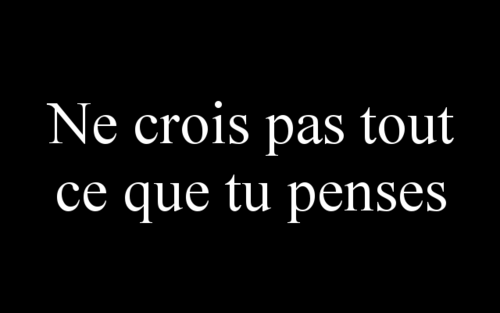

In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("260a780dcb993dd72c13a9f632227336.png")
im

In [ ]:
bounds = reader.readtext('260a780dcb993dd72c13a9f632227336.png', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-')
bounds

[([[14, 66], [492, 66], [492, 196], [14, 196]],
  'Ne crois pas tout',
  0.9987102167400954),
 ([[23, 139], [482, 139], [482, 259], [23, 259]],
  'ce que tu penses',
  0.9502273745318748)]

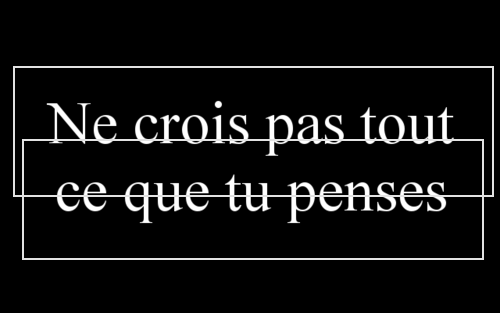

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [ ]:
text_list = reader.readtext('260a780dcb993dd72c13a9f632227336.png', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-', detail=0)
text_list

['Ne crois pas tout', 'ce que tu penses']

In [ ]:
text_comb=' '.join(text_list)
text_comb

'Ne crois pas tout ce que tu penses'

In [ ]:
print(translator.detect(text_comb))

Detected(lang=fr, confidence=None)


In [ ]:
text_en=translator.translate(text_comb, src='fr')
print(text_en.text)

Do not believe everything you think


In [ ]:
ta_tts=gTTS(text_en.text)
ta_tts.save('Englishtrans.mp3')

In [ ]:
Audio('Englishtrans.mp3' , autoplay=True)

In [ ]:
ta_tts=gTTS(text_en.text, lang='ta') 
ta_tts.save('IndianAccent.mp3')

In [ ]:
Audio('IndianAccent.mp3' , autoplay=True)

In [ ]:
text_tamil=translator.translate(text_comb, src='fr',dest='ta')
print(text_tamil.text)

நீ நினைத்ததையெல்லாம் நம்பிவிடாதே


In [ ]:
ta_tts_hi=gTTS(text_tamil.text, lang='ta')
ta_tts_hi.save('trans_tamil.mp3')

In [ ]:
Audio('trans_tamil.mp3' , autoplay=True)

In [ ]:
text_hindi=translator.translate(text_comb, src='ta',dest='hi')
print(text_hindi.text)

आप चिरोसिस बॉक्स कर्म हैं


In [ ]:
ta_tts_fr=gTTS(text_hindi.text, lang='hi')
ta_tts_fr.save('trans_hindi.mp3')

In [ ]:
Audio('trans_hindi.mp3' , autoplay=True)